In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import fetch_openml

In [3]:
titanic_data=fetch_openml("titanic",version = 1,as_frame=True)

C:\Users\Sudip Kundu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [4]:
df=titanic_data['data']

In [5]:
df['survived']=titanic_data['target']

In [6]:
df.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,1.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0
3,1.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",0
4,1.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0


<Axes: xlabel='survived', ylabel='count'>

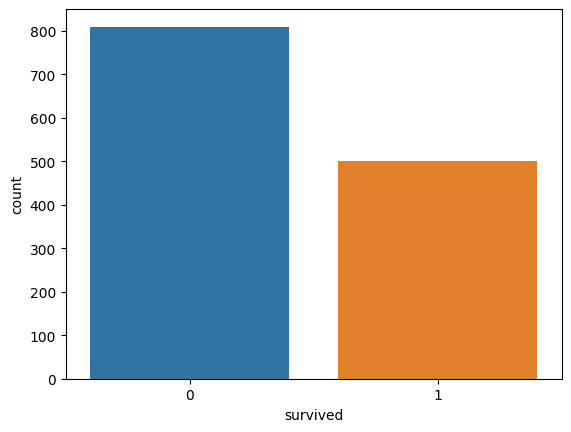

In [7]:
sns.countplot(x="survived",data=df)

<Axes: xlabel='survived', ylabel='count'>

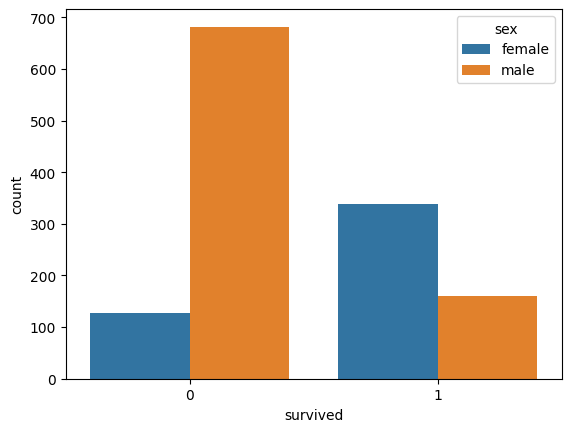

In [8]:
sns.countplot(x="survived",hue='sex',data=df)

<Axes: xlabel='survived', ylabel='count'>

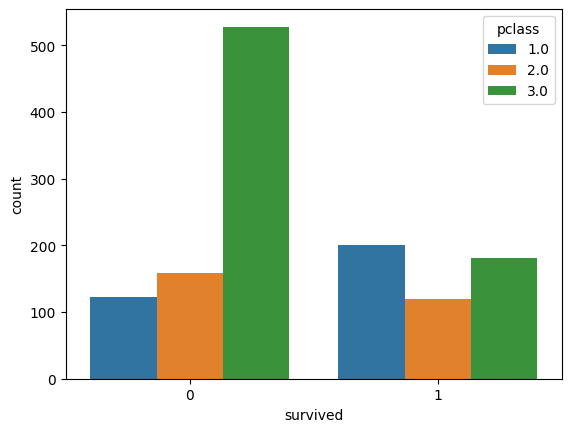

In [9]:
sns.countplot(x="survived",hue='pclass',data=df)

<Axes: ylabel='Frequency'>

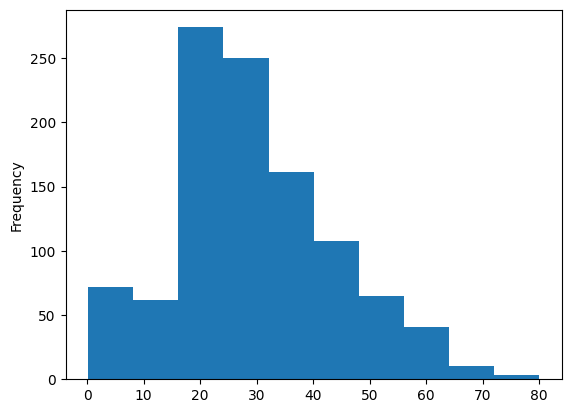

In [10]:
df['age'].plot.hist()

In [11]:
df.isnull().sum()

pclass          0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
survived        0
dtype: int64

<Axes: title={'center': 'missing values in percentage'}, ylabel='Percentage'>

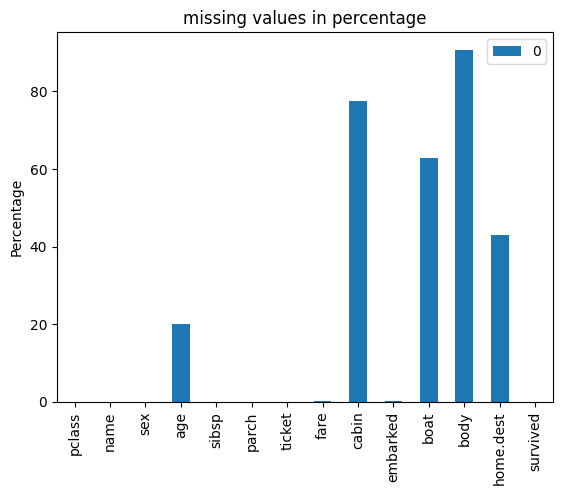

In [12]:
miss_val=pd.DataFrame(df.isnull().sum()/len(df)*100)
miss_val.plot(kind='bar', title='missing values in percentage',ylabel='Percentage')

In [13]:
df['family']=df['sibsp']+df['parch']
df.loc[df['family']>0, 'travelled_alone']=0
df.loc[df['family']==0, 'travelled_alone']=1

In [14]:
df['family'].head()

0    0.0
1    3.0
2    3.0
3    3.0
4    3.0
Name: family, dtype: float64

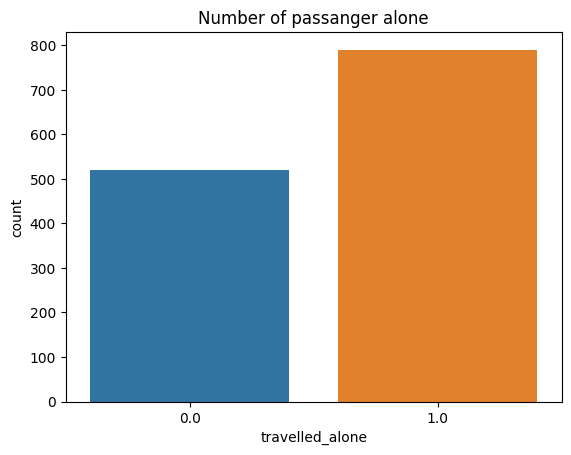

In [15]:
df.drop(['sibsp','parch'],axis=1, inplace=True)
sns.countplot(x='travelled_alone', data=df)
plt.title("Number of passanger alone")
plt.show()

In [16]:
df.head()

,pclass,name,sex,age,ticket,fare,cabin,embarked,boat,body,home.dest,survived,family,travelled_alone
0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1,0.0,1.0
1,1.0,"Allison, Master. Hudson Trevor",male,0.9167,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1,3.0,0.0
2,1.0,"Allison, Miss. Helen Loraine",female,2.0000,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0,3.0,0.0
3,1.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",0,3.0,0.0
4,1.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0,3.0,0.0


In [17]:
df.drop(['name','ticket','home.dest'],axis=1,inplace=True)

In [18]:
df.head()

,pclass,sex,age,fare,cabin,embarked,boat,body,survived,family,travelled_alone
0,1.0,female,29.0000,211.3375,B5,S,2,NaN,1,0.0,1.0
1,1.0,male,0.9167,151.5500,C22 C26,S,11,NaN,1,3.0,0.0
2,1.0,female,2.0000,151.5500,C22 C26,S,NaN,NaN,0,3.0,0.0
3,1.0,male,30.0000,151.5500,C22 C26,S,NaN,135.0,0,3.0,0.0
4,1.0,female,25.0000,151.5500,C22 C26,S,NaN,NaN,0,3.0,0.0


In [19]:
df.drop(['cabin','body','boat'],axis=1,inplace=True)

In [20]:
df.head()

,pclass,sex,age,fare,embarked,survived,family,travelled_alone
0,1.0,female,29.0000,211.3375,S,1,0.0,1.0
1,1.0,male,0.9167,151.5500,S,1,3.0,0.0
2,1.0,female,2.0000,151.5500,S,0,3.0,0.0
3,1.0,male,30.0000,151.5500,S,0,3.0,0.0
4,1.0,female,25.0000,151.5500,S,0,3.0,0.0


In [24]:
sex=pd.get_dummies(df['sex'],drop_first=True)
print(sex)

       male
0     False
1      True
2     False
3      True
4     False
...     ...
1304  False
1305  False
1306   True
1307   True
1308   True

[1309 rows x 1 columns]


In [25]:
df['sex']=sex

In [26]:
df.isnull().sum()

pclass               0
sex                  0
age                263
fare                 1
embarked             2
survived             0
family               0
travelled_alone      0
dtype: int64

In [37]:
from sklearn.impute import SimpleImputer

In [38]:
imp_mean=SimpleImputer(strategy='mean')

In [39]:
df['age']=imp_mean.fit_transform(df[['age']])
df['fare']=imp_mean.fit_transform(df[['fare']])

In [40]:
df.isnull().sum()

pclass             0
sex                0
age                0
fare               0
embarked           2
survived           0
family             0
travelled_alone    0
dtype: int64

In [59]:
imp_frquent=SimpleImputer(strategy='constant')
# imp_frquent.fit(df['category'])

In [61]:
df['embarked']=imp_frquent.fit_transform((df[['embarked']]))

ValueError: 2

In [62]:
df.isnull().sum()

pclass             0
sex                0
age                0
fare               0
embarked           0
survived           0
family             0
travelled_alone    0
dtype: int64

In [63]:
df.head()

,pclass,sex,age,fare,embarked,survived,family,travelled_alone
0,1.0,False,29.0000,211.3375,SimpleImputer(strategy='most_frequent'),1,0.0,1.0
1,1.0,True,0.9167,151.5500,SimpleImputer(strategy='most_frequent'),1,3.0,0.0
2,1.0,False,2.0000,151.5500,SimpleImputer(strategy='most_frequent'),0,3.0,0.0
3,1.0,True,30.0000,151.5500,SimpleImputer(strategy='most_frequent'),0,3.0,0.0
4,1.0,False,25.0000,151.5500,SimpleImputer(strategy='most_frequent'),0,3.0,0.0


In [64]:
embark=pd.get_dummies(df['embarked'])
embark

,SimpleImputer(strategy='most_frequent')
0,True
1,True
2,True
3,True
4,True
...,...
1304,True
1305,True
1306,True
1307,True


In [65]:
df.drop(['embarked'],axis=1,inplace=True)

In [66]:
df.head()

,pclass,sex,age,fare,survived,family,travelled_alone
0,1.0,False,29.0000,211.3375,1,0.0,1.0
1,1.0,True,0.9167,151.5500,1,3.0,0.0
2,1.0,False,2.0000,151.5500,0,3.0,0.0
3,1.0,True,30.0000,151.5500,0,3.0,0.0
4,1.0,False,25.0000,151.5500,0,3.0,0.0


In [68]:
x=df.drop(['survived'],axis=1)
x.head()

,pclass,sex,age,fare,family,travelled_alone
0,1.0,False,29.0000,211.3375,0.0,1.0
1,1.0,True,0.9167,151.5500,3.0,0.0
2,1.0,False,2.0000,151.5500,3.0,0.0
3,1.0,True,30.0000,151.5500,3.0,0.0
4,1.0,False,25.0000,151.5500,3.0,0.0


In [69]:
y=df['survived']
y.head()

0    1
1    1
2    0
3    0
4    0
Name: survived, dtype: category
Categories (2, object): ['0', '1']

In [70]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [72]:
x_train.shape


(916, 6)

In [73]:
y_train.shape


(916,)

In [74]:
x_test.shape


(393, 6)

In [75]:
y_test.shape

(393,)

In [76]:
from sklearn.linear_model import LogisticRegression
mod=LogisticRegression()
mod.fit(x_train,y_train)

LogisticRegression()

In [77]:
pred=mod.predict(x_test)

In [78]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred)

0.8015267175572519

In [79]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)

array([[207,  29],
       [ 49, 108]], dtype=int64)